# Amazon-Flex Data Science Techniques (Part II) - Juan Moctezuma

The following script creates two simple linear regression models. The data for the 1st model comes from the JETTA_VW_CAR_MILEAGE.csv which contains 2021 data from the RDF (Raw Data File) CSV file and historical data (mileage calculations from 2020 that ocurred before this project began). The second model's development was based on data from the SHIFT_DURATION_ANALYSIS.csv file. No historical data is included on the second plot, only 2021 data points. 

...

## 1. Mileage Analysis

The first step is to install the required libraries.

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install pandas

In [ ]:
#!pip install sklearn

In [ ]:
#!pip install seaborn

In [ ]:
#!pip install scipy

In [ ]:
#!pip install pylab

First step is to import the libraries that you installed.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl
from sklearn import linear_model

Once the mileage csv is placed on the correct folder, you may use pandas to read the file and create dataframe. A common practice is to print the data from your csv to make sure everything is loaded correctly.

In [2]:
data = pd.read_csv("Data/JETTA_VW_CAR_MILEAGE.csv")
df = pd.DataFrame(data, columns= ['DATE','MILEAGE'])

In [3]:
# Each date time represents different blocks
print(df)

          DATE  MILEAGE
0   2020-11-02       31
1   2020-11-03       24
2   2020-11-04       26
3   2020-11-05       21
4   2020-11-06       40
5   2020-11-09       23
6   2020-11-10       23
7   2020-11-14       21
8   2020-11-17       15
9   2020-11-19       20
10  2020-11-23       35
11  2020-12-04       52
12  2020-12-18       20
13  2020-12-28       27
14  2021-01-02       21
15  2021-01-08       26
16  2021-01-09       27
17  2021-01-15       32
18  2021-01-22       17
19  2021-01-29       37
20  2021-02-05       23
21  2021-02-12       49
22  2021-02-13       31
23  2021-02-19       31
24  2021-02-26       34


The 'describe' function allows you to obtain the basic numerical information about your data.

In [4]:
df.describe()

,MILEAGE
count,25.000000
mean,28.240000
std,9.207244
min,15.000000
25%,21.000000
50%,26.000000
75%,32.000000
max,52.000000


The following script generates the mileage analysis (scatter plot). Data gets updated occasionally.

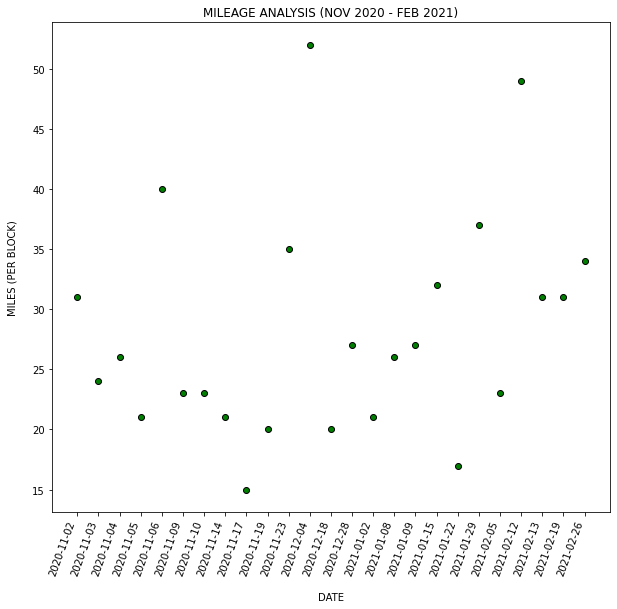

In [5]:
fig, ax = plt.subplots()
block_date = data['DATE']
mileage = data['MILEAGE']

plt.scatter(block_date, mileage, color = 'green', edgecolor = 'black', linewidth = 1, marker = 'o')
plt.title('MILEAGE ANALYSIS (NOV 2020 - FEB 2021)')
plt.xlabel("DATE", labelpad = 15)
plt.gcf().autofmt_xdate(rotation = 70)
plt.ylabel("MILES (PER BLOCK)", labelpad = 15)
plt.gcf().set_size_inches((10, 10))
plt.show()

## 2. Simple Linear Regression (Time Data)

Once the mileage csv is placed on the correct folder, you may use pandas to read the file and create dataframe. A common practice is to print the data from your csv to make sure everything is loaded correctly. In this case we are converting dates (which are strings) into datetime (data type). We use 'dtypes' to confirm the appropriate data types for eaach column.

In [6]:
data_v2 = pd.read_csv("Data/JETTA_VW_CAR_MILEAGE.csv")
data_v2['DATE'] = pd.to_datetime(data_v2['DATE'], infer_datetime_format = True)
block_date = data_v2['DATE']
mileage = data['MILEAGE']

df_v2 = pd.DataFrame(data_v2, columns= ['MILEAGE','DATE'])
df_v2.dtypes

MILEAGE             int64
DATE       datetime64[ns]
dtype: object

A common practice is to print the data from your csv to make sure everything is loaded correctly.

In [7]:
print(df_v2)

    MILEAGE       DATE
0        31 2020-11-02
1        24 2020-11-03
2        26 2020-11-04
3        21 2020-11-05
4        40 2020-11-06
5        23 2020-11-09
6        23 2020-11-10
7        21 2020-11-14
8        15 2020-11-17
9        20 2020-11-19
10       35 2020-11-23
11       52 2020-12-04
12       20 2020-12-18
13       27 2020-12-28
14       21 2021-01-02
15       26 2021-01-08
16       27 2021-01-09
17       32 2021-01-15
18       17 2021-01-22
19       37 2021-01-29
20       23 2021-02-05
21       49 2021-02-12
22       31 2021-02-13
23       31 2021-02-19
24       34 2021-02-26


Seaborn library doesn't function efficiently with dates, therefore we need to create ordinal data that is equivalent to our original dates. A common practice is to print the data from your csv to make sure everything is loaded correctly.

In [8]:
df_v2['DATE_ORDINAL'] = pd.to_datetime(df_v2['DATE']).apply(lambda date: date.toordinal())

In [9]:
print(df_v2)

    MILEAGE       DATE  DATE_ORDINAL
0        31 2020-11-02        737731
1        24 2020-11-03        737732
2        26 2020-11-04        737733
3        21 2020-11-05        737734
4        40 2020-11-06        737735
5        23 2020-11-09        737738
6        23 2020-11-10        737739
7        21 2020-11-14        737743
8        15 2020-11-17        737746
9        20 2020-11-19        737748
10       35 2020-11-23        737752
11       52 2020-12-04        737763
12       20 2020-12-18        737777
13       27 2020-12-28        737787
14       21 2021-01-02        737792
15       26 2021-01-08        737798
16       27 2021-01-09        737799
17       32 2021-01-15        737805
18       17 2021-01-22        737812
19       37 2021-01-29        737819
20       23 2021-02-05        737826
21       49 2021-02-12        737833
22       31 2021-02-13        737834
23       31 2021-02-19        737840
24       34 2021-02-26        737847


Once ordinal data is ready, we plot our simple linear regression.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


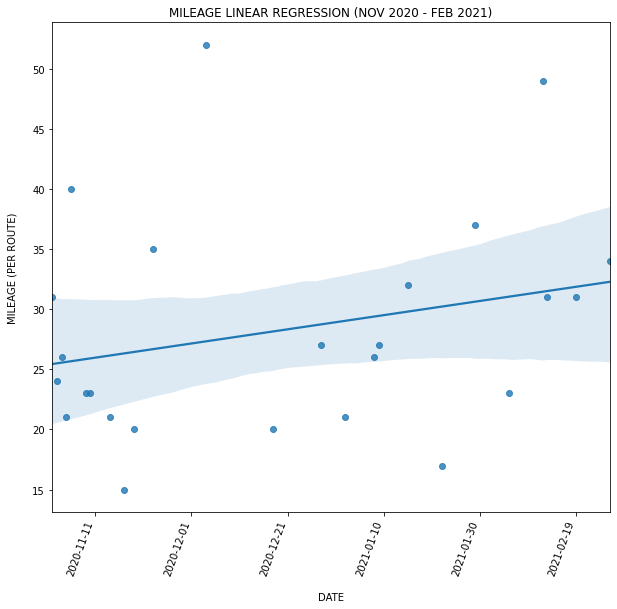

In [10]:
ax = sns.regplot(data=df_v2, x='DATE_ORDINAL', y='MILEAGE',)

plt.title('MILEAGE LINEAR REGRESSION (NOV 2020 - FEB 2021)')
plt.xlabel("DATE", labelpad = 15)
plt.ylabel("MILEAGE (PER ROUTE)", labelpad = 15)
plt.gcf().autofmt_xdate(rotation = 70)

ord_to_date = ['2020-11-11','2020-11-11','2020-12-01','2020-12-21','2021-01-10','2021-01-30','2021-02-19']
pl.gca().set_xticklabels(ord_to_date)
plt.gcf().set_size_inches((10, 10))
plt.show()

## 3. Simple Linear Regression (Miles vs. Package No.)

Once the shift duration analysis csv is placed on the correct folder, you may use pandas to read the file and create dataframe. A common practice is to print the data from your csv to make sure everything is loaded correctly. In this case we are converting dates (which are strings) into datetime (data type). We use 'dtypes' to confirm the appropriate data types for each column.

In [11]:
data_v3 = pd.read_csv("Data/MILES_VS_PACKAGES_ANALYSIS.csv")
data_v3['DATE'] = pd.to_datetime(data_v3['DATE'], infer_datetime_format = True)

df_v3 = pd.DataFrame(data_v3, columns= ['DATE','ROUTE_MILEAGE','TOTAL_PKGS'])
df_v3.dtypes

DATE             datetime64[ns]
ROUTE_MILEAGE             int64
TOTAL_PKGS                int64
dtype: object

A common practice is to print the data from your csv to make sure everything is loaded correctly.

In [12]:
print(df_v3)

        DATE  ROUTE_MILEAGE  TOTAL_PKGS
0 2021-01-02             21          54
1 2021-01-08             26          38
2 2021-01-15             32          33
3 2021-01-22             17          40
4 2021-01-29             37          30
5 2021-02-05             23          39
6 2021-02-12             49          31
7 2021-02-13             31          46
8 2021-02-19             31          26
9 2021-02-26             34          28


The following plot represents the mileage vs. total package number analysis.

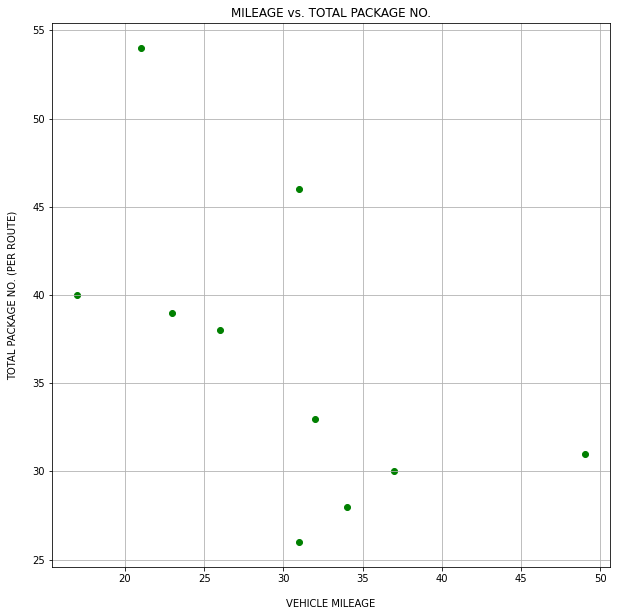

In [13]:
plt.scatter(df_v3['ROUTE_MILEAGE'], df_v3['TOTAL_PKGS'], color='green')
plt.title('MILEAGE vs. TOTAL PACKAGE NO.')
plt.xlabel('VEHICLE MILEAGE', labelpad = 15)
plt.ylabel('TOTAL PACKAGE NO. (PER ROUTE)', labelpad = 15)
plt.grid(True)
plt.gcf().set_size_inches((10, 10))
plt.show()

The following creates a box plot with mileage and package number data. 

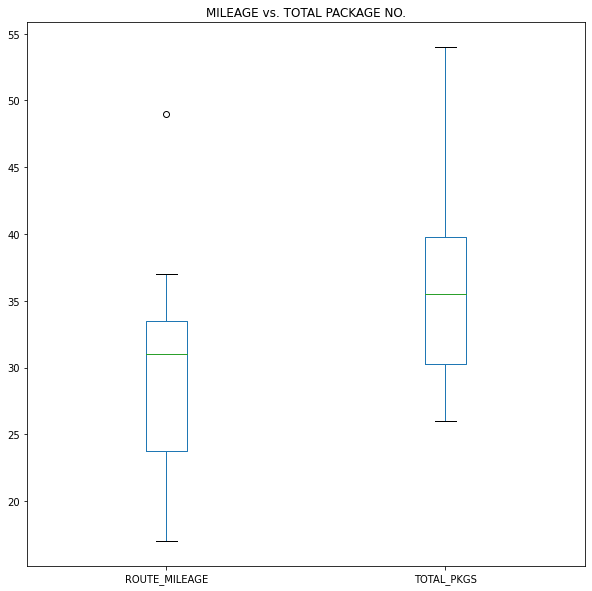

In [14]:
df_v4 = pd.DataFrame(data_v3, columns= ['ROUTE_MILEAGE','TOTAL_PKGS'])
df_v4.plot(kind = 'box')
plt.title('MILEAGE vs. TOTAL PACKAGE NO.')
plt.gcf().set_size_inches((10, 10))
plt.show()

Correlation coefficients.

In [15]:
df_v4.corr()

,ROUTE_MILEAGE,TOTAL_PKGS
ROUTE_MILEAGE,1.000000,-0.585299
TOTAL_PKGS,-0.585299,1.000000


Change columns to dataframe variables.

In [16]:
route_miles = pd.DataFrame(df_v4['ROUTE_MILEAGE'])
tot_pkg_no = pd.DataFrame(df_v4['TOTAL_PKGS'])

In [17]:
#route_miles
#tot_pkg_no

A common practice is to print the data to make sure everything is compiled correctly.

In [18]:
print(route_miles)
print(tot_pkg_no)

   ROUTE_MILEAGE
0             21
1             26
2             32
3             17
4             37
5             23
6             49
7             31
8             31
9             34
   TOTAL_PKGS
0          54
1          38
2          33
3          40
4          30
5          39
6          31
7          46
8          26
9          28


We build the Linear Regression Model (that's why we import sklearn).

In [19]:
lm = linear_model.LinearRegression()
model = lm.fit(route_miles, tot_pkg_no)

We need to check the coefficient, intercept and score to evaluate the model.

In [20]:
model.coef_

array([[-0.56031597]])

In [21]:
model.intercept_

array([53.36551078])

In [22]:
model.score(route_miles, tot_pkg_no)

0.3425744843967192

As we predict new values for tot. package number per shift, we select random numbers that represent miles (within array).

In [23]:
New_Mileage = np.array([30,35,40])
New_Mileage = New_Mileage.reshape(-1,1)
Pkg_No_Predict = model.predict(New_Mileage)
Pkg_No_Predict

array([[36.5560316 ],
       [33.75445173],
       [30.95287187]])

We are testing the random array.

In [24]:
X = ([30,35,38])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df_v5 = pd.concat([X,Y], axis=1, keys=['New_Mileage','Pkg_No_Predict'])
df_v5

,New_Mileage,Pkg_No_Predict
,0,0
0,30,36.556032
1,35,33.754452
2,38,32.073504


We now visualize the simple linear regression model. The red line is the regression itself. The black data points represent our random array (predictive values)

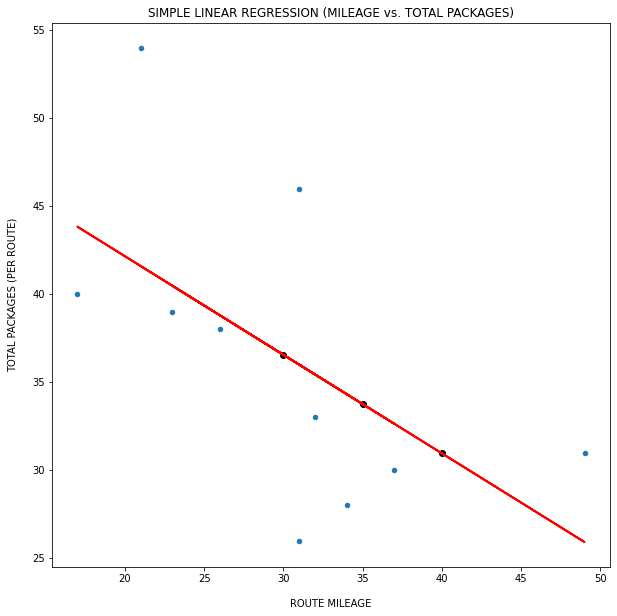

In [25]:
# Visualize The Result
data_v3.plot(kind='scatter', x='ROUTE_MILEAGE', y='TOTAL_PKGS')

# Plotting The Regression 
plt.plot(route_miles, model.predict(route_miles), color='red', linewidth=2)

# Plotting The Predict Value
plt.scatter(New_Mileage, Pkg_No_Predict, color='black')
plt.title('SIMPLE LINEAR REGRESSION (MILEAGE vs. TOTAL PACKAGES)')
plt.xlabel("ROUTE MILEAGE", labelpad = 15)
plt.ylabel("TOTAL PACKAGES (PER ROUTE)", labelpad = 15)
plt.gcf().set_size_inches((10, 10))
plt.show()

## 4. Conclusion

In [ ]:
# The 1st simple linear regression (dates vs. miles) model predicts mileage will steadily increment in each shift, 
# however the dataset is quite small yet, therefore this behavior might change as more data get compiled.

In [ ]:
# The 2nd simple linear regression (miles vs. total packages x shift) predicts that the random package number will 
# decrease as the route covers more distance, which makes sense because the app provides less packages to deliver 
# in longer routes.